In [1]:

#support vector machine draws a hyper Plane in n dimensional space such that it maximies the margin betweem classification group
#gamma and regulization
#support vector machine is a popular machine learning algorithm used for classification and regression analysis. it works by finding the 
#optimal decision boundary(hyperplane )that seperates different classes in a dataset.
#SVM uses a kernel function to transform the input data into a higher dimensional space
#where it becomes easier to find the decision boundary



#the kernel function has a parameter called gamma, which determines the shape of the decision boundary
#gamma controls the radius of influence of single trainig example
#with low values meaning 'far' and high values meanning 'close' 
#A high gamma value means that only nearby points have a significant impact on the decision boundary
#a low gamma value means that the decision boundary is smoother and more generalized

#a highgamma value makes the algorithm more prone to overffiting, which means that the model may perform well on the training data but poorly on unseen data
#low gamma makes the model  less prone to overfitting but may lead to underfitting where the model is too simplistic and fails to capture  the underlying patterns in data



In [2]:
#underfitting and overfitting leads to poor performance of the model on new, unseen data
#underfitting occurs when the model is too simple to capture the underlying patterns in the data this can happen when the model has too few features , is too constrained or is not trained for enough iterations
#high bias and low variance which means it has difficulty fitting the training data may not be able to generalize well on new data an underfit model is usually characterized by poor performance on both training and test data


#overfitting occurs when the model is too complex and fits the trainig data too closely, capturing noise or random flictuation of in the data.
#this can happen when the model has too many features, is too flexible ot is trained for too many iterations.
#low bias and high variance which means  it fits the training data very well but may not generalized well to new data
#an overfit model is usually characterized by very good performance on the training data but poor performance on the test data


In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [12]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [16]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


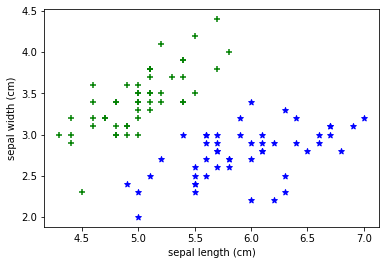

In [17]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='*')
#plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker='.')

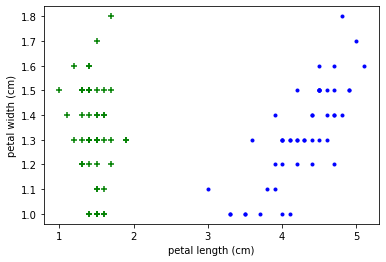

In [18]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df1['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
x=df.drop(['target','flower_name'],axis='columns')
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y=df.target

In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [23]:
len(X_train)

120

In [24]:
len(X_test)

30

In [30]:
from sklearn.svm import SVC
model = SVC(kernel='linear', degree=3, C=1.0, gamma='scale')

In [31]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [32]:
model.predict(X_test)

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [33]:
model.score(X_test,y_test)

0.9666666666666667